# Singly Linked List

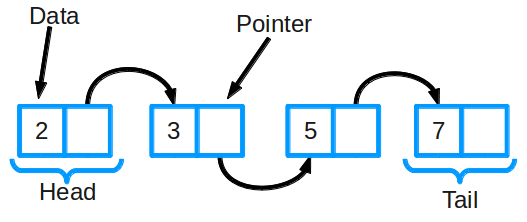

Every node has data and a pointer to the next node

## Defining the node

In [4]:
class Node:
    def __init__(self, d, n=None):
        self.data = d
        self.next_node = n

    def get_next(self):
        return self.next_node

    def set_next(self, n):
        self.next_node = n

    def get_data(self):
        return self.data

    def set_data(self, d):
        self.data = d

    def __str__(self):
        return "Node value: " + str(self.data)

### Stack  
Last in First Out  
We will use a stack in defining the is_palindrome method of a singly linked list

In [5]:
class Stack: #last in first out
    def __init__(self):
        self.stack = []
    def push(self,d):
        return self.stack.append(d)
    def pop(self):
        if len(self.stack) > 0:
            return self.stack.pop()
        else:
            return None
    def peek(self):
        if len(self.stack) > 0:
            return self.stack[len(self.stack) - 1]
        else:
            return None
    def __len__(self):
        return len(self.stack)
    def __str__(self):
        return str(self.stack)

## Define the Singly Linked List

In [9]:
class LinkedList:
    
    def __init__(self, r=None):
        self.root = r #root is also known as the head of the linked list
        self.size = 0

    def get_size(self):
        return self.size #number of nodes in the list

    def add(self, d):
        new_node = Node(d, self.root) #new nodes are added at the start of the list
        self.root = new_node
        self.size += 1

    
    def nth2Last(self, n):
        '''
            Returns the data of the n'th to last node.
            Current and follower pointers initialized to the root.
            Move current pointer by n, maintain follower at the root.
            Move current and follower simultaneously until current points to the tail.
            Get the data of the node pointed to by the follower
        '''
        curr = follower = self.root
        nth2Last = None
        for i in range(n):
            try:
                curr = curr.get_next()
            except:
                return None # n bigger than length of linked list
        while curr:
            if curr.get_next() == None:
                nth2Last = follower.get_data()
            curr = curr.get_next()
            follower = follower.get_next()
        return nth2Last

    def has_cycle(self):#Floyd's algorithm
        
        '''
        Uses Floyd's algorithm to determine if a singly linked list has a cycle
        Floyd's Algorithm
            There are two pointers
            Slow pointer set to root, fast pointer set to second node
            Slow pointer moved by one, fast pointer moved by two
            If there is a cycle, at some point both pointers will point to the same node.
            If there is no cycle, moving the fast pointer will eventually point past the tail.
        '''
        root=self.root
        slow_pointer = root
        fast_pointer = root.next_node
        while fast_pointer:
            if slow_pointer.get_data() == fast_pointer.get_data():
                return True
            slow_pointer = slow_pointer.get_next()
            fast_pointer = fast_pointer.get_next().get_next()
        return False

    def set_cycle(self, d, e):
        this_node = self.root
        node_d = None
        node_e = None
        while this_node:
            if this_node.get_data() == d:
                node_d = this_node
            elif this_node.get_data() == e:
                node_e = this_node
            this_node = this_node.get_next()
        node_d.set_next(node_e)
        return print(' cycle set:node {} to node {}'.format(d,e))

    
    def remove_duplicates(self):
        '''
            Uses a set to check for duplicates.
            Storage and time requirements grow linearly with the list. 
            O(n) time, O(n) space
        '''
        seen = set()
        root = self.root
        seen.add(root.get_data())
        prev_node = root
        this_node = root.get_next()
        while this_node is not None:
            if this_node.get_data() in seen:
                prev_node.set_next(this_node.get_next())
            else:
                seen.add(this_node.get_data())
                prev_node = this_node
            this_node = this_node.get_next()
        return print('there are no more duplicates')

    
    def remove_duplicates2(self):
        '''
           No extra storage required. 
           O(n**2) time - Quadratic time , if the list is too long, it takes very long to remove duplicates.
           O(1) space - constant space 
        '''
        this_node = self.root
        prev = this_node
        while this_node:
            nxt = this_node.get_next()
            while nxt:
                if nxt.get_data() == this_node.get_data():
                    prev.set_next(nxt.get_next())
                else:
                    prev = nxt
                nxt = nxt.get_next()
            this_node = this_node.get_next()
        return print('duplicates removed')

    def remove(self, d):
        this_node = self.root
        prev_node = None
        while this_node:
            if this_node.get_data() == d:
                if prev_node:
                    prev_node.set_next(this_node.get_next())
                else:#data at the root node
                    self.root = this_node.get_next()
                self.size -= 1
                return print('True:removed {}'.format(d))  # data removed
            else:
                prev_node = this_node
                this_node = this_node.get_next()
        return "False: {} is not in this list".format(d)  # data not found

    def find(self, d):
        this_node = self.root
        while this_node:
            if this_node.get_data() == d:
                return d
            else:
                this_node = this_node.get_next()
        return "None: I couldnt find {}".format(d)
    
    
    def is_palindrome(self):
        '''
            is_palindrome()
            Returns True if the list is the same backwards as it is forward
            A list can either have an odd or even number of elements.

            Set current and runner pointers to the root
            Push the value of the current node to a stack
            Move both current and runner. Curr by 1, runner by 2
            keep moving them as long as the runner points to a valid node and the next node is valid.

            If the while loop breaks due to the runner being at the tail, ie. runner.next = None, then the 
            list has an odd number of elements.
            Set the current to the next node

            Elif the while loop breaks due to the runner being invalid, ie. runner=None, the list has an even 
            number of elements.
            Leave current at its location.

            Keep moving the current to its next node while popping the stack and checking if the value matches 
            the data of the current node.
            If this condition fails, return False, otherwise return True.
        '''
        curr = runner = self.root
        stack = Stack()
        while runner is not None and runner.get_next() != None:
            stack.push(curr.get_data())
            curr = curr.get_next()
            runner = runner.get_next().get_next()
             
        if runner != None: # odd number of nodes
            curr = curr.get_next()
            while curr:
                if curr.get_data() != stack.pop():
                    return False
                curr = curr.get_next()
            return True
        else: # even number of nodes
            while curr:
                if curr.get_data() != stack.pop():
                    return False
                curr = curr.get_next()
            return True
    

    def reversePointer(self): # O(n) time O(1) space
        '''
            There are two ways to reverse a singly linked list
            1. Iterative reversal: Involves reversing the pointers.
                O(n) time O(1) space
            2. Recursive reversal

        '''
        print('REVERSING POINTERS or iterative reversal')
        prev = None
        curr = self.root
        #nxt = None
        while curr:
            nxt = curr.get_next()
            curr.set_next(prev)
            print('PREV:', prev)
            print('CURR:', curr)
            print('NXT:', nxt)
            print()
            prev = curr
            curr = nxt
        curr = self.root = prev
        while curr:
            #print(curr)
            curr = curr.get_next()

    
    def reverse_recursive(self, root):
        '''
            1) Divide the list in two parts - first node and
                rest of the linked list.
            2) Call reverse for the rest of the linked list.
            3) Link rest to first.
            4) Fix head pointer
        '''

        # If head is empty or has reached the list end
        if root is None or root.get_next() is None:
            print(f"root: {root}")
            print(f"root_next: {root.get_next()}")
            print()
            return root

        # Reverse the rest list
        rest = self.reverse_recursive(root.get_next())

        # Put first element at the end
        print(f"Current node: {root}")
        root.get_next().set_next(root)
        print(f"curr_next: {root.get_next()}")
        root.set_next(None)
        print(f"curr_next: {root.get_next()}")
        print(f"rest: {rest}")
        print()

        # Fix the header pointer
        return rest
    
    
    def split_list(self):
        '''
            Split list into two
        '''
        curr =  self.root
        runner = self.root.get_next()
        stack = Stack()
        while runner is not None and runner.get_next():
            stack.push(curr.get_data())
            curr = curr.get_next()
            runner = runner.get_next().get_next()

        #nxt = curr.get_next()
        curr.set_next(None)
     
    def __str__(self):
        linkedListStr = ""
        temp = self.root
        while temp:
            linkedListStr = (linkedListStr +
                             str(temp.get_data()) + " ")
            temp = temp.get_next()
        return linkedListStr
        

In [10]:
def main():
    myList = LinkedList()
    lst = ['G','F','E','D','C','B','A']
    for i in lst:
        myList.add(i)
    print(f'Original List: {myList}')
    
    print(f'is palindrome:{myList.is_palindrome()}')
    print()

    myList.reversePointer()
    print(myList)
    print()

    myList.root=myList.reverse_recursive(myList.root)
    print('Reversing recursively')
    print(myList)
    print()

    myList.split_list()
    print('Split list:')
    print(myList)

main()

Original List: A B C D E F G 
is palindrome:False

REVERSING POINTERS or iterative reversal
PREV: None
CURR: Node value: A
NXT: Node value: B

PREV: Node value: A
CURR: Node value: B
NXT: Node value: C

PREV: Node value: B
CURR: Node value: C
NXT: Node value: D

PREV: Node value: C
CURR: Node value: D
NXT: Node value: E

PREV: Node value: D
CURR: Node value: E
NXT: Node value: F

PREV: Node value: E
CURR: Node value: F
NXT: Node value: G

PREV: Node value: F
CURR: Node value: G
NXT: None

G F E D C B A 

root: Node value: A
root_next: None

Current node: Node value: B
curr_next: Node value: A
curr_next: None
rest: Node value: A

Current node: Node value: C
curr_next: Node value: B
curr_next: None
rest: Node value: A

Current node: Node value: D
curr_next: Node value: C
curr_next: None
rest: Node value: A

Current node: Node value: E
curr_next: Node value: D
curr_next: None
rest: Node value: A

Current node: Node value: F
curr_next: Node value: E
curr_next: None
rest: Node value: A

Cur

In [11]:
def main2():
    myList = LinkedList()
    lst=[5,8,12,8,9,90,5,10,9,10,10]
    for i in lst:
        myList.add(i)
    print(myList)

    myList.remove_duplicates2()
    print(myList)

    myList.set_cycle(12,9)
    print(myList.has_cycle())
    cur=myList.root
    print(cur)
    for i in range(15):
        cur=cur.get_next()
        print(cur)

    lst2=[2,5,6,4,8,9,5,2,3]
    myList2=LinkedList()
    for i in lst2:
        myList2.add(i)
    print(f'Has cycle:{myList2.has_cycle()}')
    print(myList2)
    print(f'nth2last:{myList2.nth2Last(5)}')

main2()

10 10 9 10 5 90 9 8 12 8 5 
duplicates removed
10 9 5 90 8 12 
 cycle set:node 12 to node 9
True
Node value: 10
Node value: 9
Node value: 5
Node value: 90
Node value: 8
Node value: 12
Node value: 9
Node value: 5
Node value: 90
Node value: 8
Node value: 12
Node value: 9
Node value: 5
Node value: 90
Node value: 8
Node value: 12
Has cycle:False
3 2 5 9 8 4 6 5 2 
nth2last:9
